# Building RNN with Pytorch

Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:
1. Sur un problème linéaire, nous allons utiliser les torch optimizers pour trouver le paramètre de régression idéal
2. Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
3. Sur un problème de texte, nous allons construire un modèle RNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## Optimizers

### Données example
Nous allons construire des données $y = \beta^* X + b$


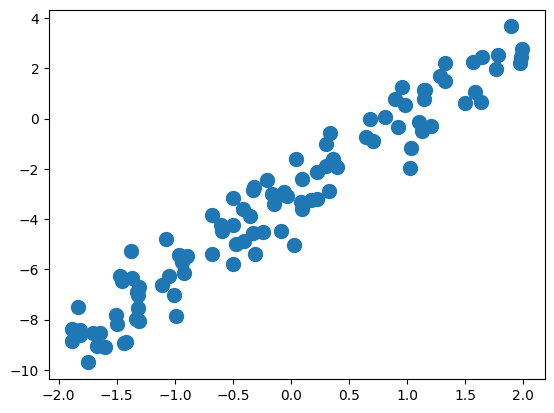

In [2]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [3]:
import torch.nn as nn
import torch.optim as optim

# Initialisation du paramètre beta
beta = nn.Parameter(torch.randn(1))

# Déclaration de la fonction de perte (MSE Loss)
loss_fn = nn.MSELoss()

# Déclaration de l'optimiseur (Adam)
optimizer = optim.Adam([beta], lr=0.1)

# Nombre d'époques pour l'entraînement
n_epochs = 1000

# Boucle d'entraînement
for epoch in range(n_epochs):
    # Réinitialisation des gradients
    optimizer.zero_grad()

    # Calcul des prédictions
    y_pred = beta * x

    # Calcul de la perte
    loss = loss_fn(y_pred, torch.tensor(y, dtype=torch.float32))

    # Rétropropagation pour calculer les gradients
    loss.backward()

    # Mise à jour des paramètres
    optimizer.step()

    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}')

/home/divino/miniconda3/envs/school-nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 0: loss = 23.443559646606445
Epoch 100: loss = 9.892382621765137
Epoch 200: loss = 9.891936302185059
Epoch 300: loss = 9.891936302185059
Epoch 400: loss = 9.891936302185059
Epoch 500: loss = 9.891936302185059
Epoch 600: loss = 9.891936302185059
Epoch 700: loss = 9.891936302185059
Epoch 800: loss = 9.891936302185059
Epoch 900: loss = 9.891936302185059


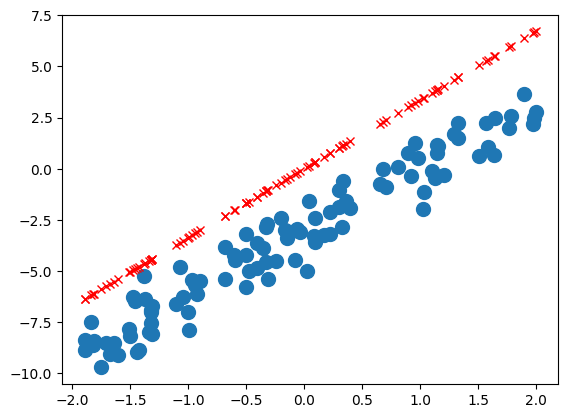

In [4]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, beta.detach() * x, 'rx')

## Construire un multi-layer perceptron (MLP)

Ici, les données sont $y = a x^2 + b$

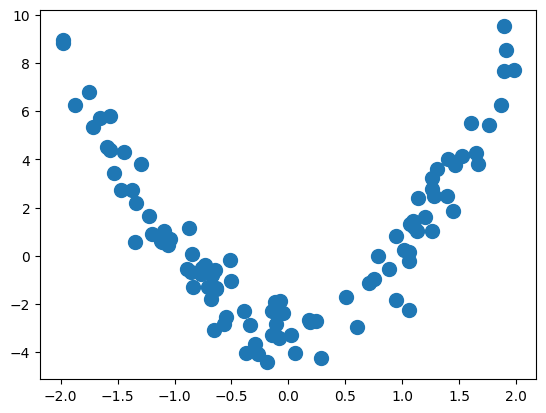

In [5]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron 

In [6]:
class MLP(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        prev_size = input_size
            
        self.layer = torch.nn.Linear(input_size, 1)

    def forward(self, X):
        X = self.layer(X)
        
        return X

En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP 

In [7]:
# Conversion de y en un tensor PyTorch
y_tensor = torch.tensor(y, dtype=torch.float32)

# Création du modèle MLP
model = MLP(input_size=1)

# Définition de la fonction de perte (MSE Loss)
loss_function = nn.MSELoss()

# Définition de l'optimiseur (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Nombre d'époques pour l'entraînement
n_epochs = 1000

# Boucle d'entraînement
for epoch in range(n_epochs):
    optimizer.zero_grad()  # Réinitialisation des gradients
    y_pred = model(x)      # Prédiction du modèle
    loss = loss_function(y_pred, y_tensor)  # Calcul de la perte
    loss.backward()        # Rétropropagation pour calculer les gradients
    optimizer.step()       # Mise à jour des paramètres du modèle

    # Affichage optionnel de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

Epoch 1/1000, Loss: 15.315342903137207
Epoch 101/1000, Loss: 12.098596572875977
Epoch 201/1000, Loss: 11.596074104309082
Epoch 301/1000, Loss: 11.556496620178223
Epoch 401/1000, Loss: 11.555031776428223
Epoch 501/1000, Loss: 11.555010795593262
Epoch 601/1000, Loss: 11.555009841918945
Epoch 701/1000, Loss: 11.555010795593262
Epoch 801/1000, Loss: 11.555010795593262
Epoch 901/1000, Loss: 11.555010795593262


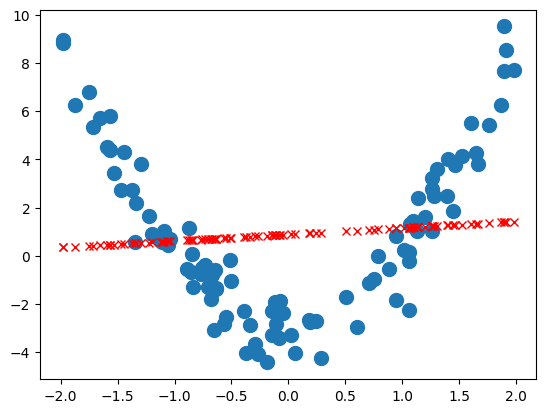

In [8]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, model(x).detach().numpy(), 'rx')

## Construire un Recurrent Neural Network (RNN) from scratch

### Données
 
Téléchargez [ici](https://download.pytorch.org/tutorial/data.zip) un jeu de données "nom" -> pays d'origine du nom.
Les noms de chaque pays sont dans leur fichier texte "[country].txt"

A partir de ces données, créez X la liste des noms et y le pays d'origine de chaque nom

### Aide pour générer les données

A la fin de ce code, on lit les noms et leur pays d'origine.<br>
On a une fonction randomTrainingExample, qui génère le pays d'origine et le nom (en texte), puis l'ID de ce pays et le tenseur représetant le nom. <br>

A partir de là, vous pouvez générer les données X, y comme vous voulez

In [9]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random
import string
import time
import unicodedata

path = Path("../data/raw/names/")

In [10]:
def read_names(path):
    category_lines = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue
            
        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]
        
        category = file.stem
        category_lines[category] = names

    return category_lines

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [11]:
category_lines = read_names(path)
all_categories = list(category_lines.keys())
n_categories = len(all_categories)

In [12]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [13]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = German / line = Fleischer
category = Spanish / line = Esparza
category = Dutch / line = Bueren
category = Czech / line = Ponec
category = English / line = Packard
category = English / line = Elwood
category = Chinese / line = OuYang
category = Dutch / line = Ven
category = Spanish / line = Rojas
category = Portuguese / line = Mendes


### Construire le RNN

Un Recurrent Neural Network prend, pour prédire un input X et un hidden state H.<br>
Il output une prédiction et un nouvel hidden state pour la prochaine étape.<br>
Nous allons construire un modèle:

$f(name, H_0) = (proba(\mbox{name from country 0}), proba(\mbox{name from country 1}), \dots)$

Avec $H_0$ un hidden state initial (qui sera appris).

Pour l'instant, nous allons construire un RNN linéaire.<br>
Comme pour le MLP, construisez un torch.nn.Module:
- A l'init, la classe prendra les arguments input_size, hidden_state_dim, output_size
- L'init déclare un paramètre pour l'hidden state initial $H_0$, une layer linéaire prenant (input, hidden_state) -> output_size
- Le forward fonctionnera ainsi:
    - hidden_state = $H_0$
    - For letter in name:
        - x = one-hot encode (letter)
        - output, hidden_state = linear_layer(x, hidden_state)
    - return softmax(output)


In [14]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        # Initialisation de l'état caché
        self.hidden0 = nn.Parameter(torch.zeros(1, hidden_size))

        # Couche linéaire combinant l'entrée et l'état caché précédent
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return self.hidden0


A l'aide de la negative log likelihood (torch.nn.NLLLoss), construisez une boucle optimisant ce modèle (optimizer, itération au sein des examples).

**Attention 1:** Ici, on n'a pas des tenseurs X, y. On va prendre les exemples 1 par 1.<br>
**Attention 2:** Si le modèle apprend les examples dans l'ordre (d'abord tous les noms arabes, puis tous les chinois, puis tous les tchèques, etc), cela changera grandement le résulat (et le modèle sera très mauvais)

In [15]:
# Paramètres du RNN
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

# Fonction de perte et optimiseur
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.005)

# Nombre d'itérations
n_iters = 100000
print_every = 5000

# Boucle d'entraînement
for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    optimizer.step()

    if iter % print_every == 0:
        print(f'Iter {iter} / {n_iters} Loss: {loss.item()}')


Iter 5000 / 100000 Loss: 2.082843780517578
Iter 10000 / 100000 Loss: 1.6041464805603027
Iter 15000 / 100000 Loss: 2.1244964599609375
Iter 20000 / 100000 Loss: 2.164217948913574
Iter 25000 / 100000 Loss: 3.5668692588806152
Iter 30000 / 100000 Loss: 5.88637113571167
Iter 35000 / 100000 Loss: 0.9070910811424255
Iter 40000 / 100000 Loss: 0.24020855128765106
Iter 45000 / 100000 Loss: 3.7758216857910156
Iter 50000 / 100000 Loss: 1.3735618591308594
Iter 55000 / 100000 Loss: 0.8841211795806885
Iter 60000 / 100000 Loss: 3.056755542755127
Iter 65000 / 100000 Loss: 0.4043940305709839
Iter 70000 / 100000 Loss: 0.9677661061286926
Iter 75000 / 100000 Loss: 0.8340935707092285
Iter 80000 / 100000 Loss: 1.8434813022613525
Iter 85000 / 100000 Loss: 0.9348053336143494
Iter 90000 / 100000 Loss: 2.045478343963623
Iter 95000 / 100000 Loss: 1.1252918243408203
Iter 100000 / 100000 Loss: 0.7411342859268188


## Utilisez les RNNs de Pytorch

Sur le même jeu de données, nous allons utiliser les RNNs déjà codés par Pytorch.<br>

### Padding

Nous voulons aussi utiliser des tenseurs X et y pour utiliser data loader pour les batchs, etc


Avec du padding, créer un tenseur X de la taille (nb_data, name_max_length, vocab_size). <br>
X[i, j, :] contient le one-hot encode de la j-ème lettre du i-ème prénom. Si le i-ème prénom a moins de j lettre, alors X[i, j, :] est un vecteur nul

In [16]:
# Déterminez la longueur maximale des noms
name_max_length = max([len(name) for names in category_lines.values() for name in names])

# Créez un tenseur X pour le padding
X_padded = torch.zeros(len(all_categories), name_max_length, n_letters)

# Remplissez X_padded avec les données encodées
for i, category in enumerate(all_categories):
    for name in category_lines[category]:
        for li, letter in enumerate(name):
            X_padded[i, li, letterToIndex(letter)] = 1

print(X_padded)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 1.],
         [1., 1., 1.,  ..., 0., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 1.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

### Modèle

Construisez un modèle qui:
- A l'init, déclare un hidden state initial $H_0$, un RNN (avec torch.nn.RNN)
- Au forward, passe (input, $H_0$) dans le RNN, puis applique un softmax à l'output

In [17]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out


Entraînez le modèle avec des batchs de X, y

In [18]:
# Paramètres
input_size = n_letters
hidden_size = 128
output_size = n_categories

model = RNNModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Boucle d'entraînement
n_epochs = 100

for epoch in range(n_epochs):
    for i, category in enumerate(all_categories):
        optimizer.zero_grad()
        output = model(X_padded[i].unsqueeze(0))
        loss = criterion(output, torch.tensor([i]))
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')


Epoch 1/100, Loss: 3.070542097091675
Epoch 2/100, Loss: 3.031369686126709
Epoch 3/100, Loss: 2.963955879211426
Epoch 4/100, Loss: 2.5650033950805664
Epoch 5/100, Loss: 2.092623233795166
Epoch 6/100, Loss: 2.0570528507232666
Epoch 7/100, Loss: 4.598284721374512
Epoch 8/100, Loss: 3.0612587928771973
Epoch 9/100, Loss: 3.012284278869629
Epoch 10/100, Loss: 3.063504934310913
Epoch 11/100, Loss: 2.9474751949310303
Epoch 12/100, Loss: 2.6640937328338623
Epoch 13/100, Loss: 2.564892530441284
Epoch 14/100, Loss: 2.262772560119629
Epoch 15/100, Loss: 2.0546491146087646
Epoch 16/100, Loss: 1.6525369882583618
Epoch 17/100, Loss: 1.5392284393310547
Epoch 18/100, Loss: 1.206326961517334
Epoch 19/100, Loss: 0.8904682993888855
Epoch 20/100, Loss: 1.0207654237747192
Epoch 21/100, Loss: 0.7801892757415771
Epoch 22/100, Loss: 0.5228069424629211
Epoch 23/100, Loss: 0.605859100818634
Epoch 24/100, Loss: 0.6305668354034424
Epoch 25/100, Loss: 0.6935902833938599
Epoch 26/100, Loss: 0.45282870531082153
Epoch

### Amélioration du modèle

Tenter d'améliorer le modèle:
- En utilisant plusieurs layers dans le RNN
- En utilisant LSTM à la place de RNN (une autre forme de recurrent neural network, plus avancé)

(regardez la doc)

In [19]:
class ImprovedRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(ImprovedRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


### Embedding

On veut utiliser en embedding pour les lettres.
Le forward appliquerait l'embedding aux lettres, puis les layers RNN prendrait l'embedding comme input

Nous allons utiliser torch.nn.Embedding
**Attention**: Embedding ne prend pas les lettres one-hot encoded, mais leurs indices.
Par exemple, "abca", il lui faudrait le vecteur [0, 1, 2, 0]<br>
et non [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

**Expérimenter torch.nn.Embedding**<br>
Instantier "emb" une torch.nn.Embedding avec les bons paramètres (regardez la doc)
En construisant le bon tenseur X_emb,

```emb(X_emb)```

doit retourner un tenseur (qui n'a pas de sens car il n'a rien appris pour l'instant, mais les opérations se passent bien)

In [20]:
# Créer une instance d'Embedding
emb = nn.Embedding(n_letters, 10)  # 10 est la taille de l'embedding

# Exemple d'utilisation de l'embedding
example_idx = [letterToIndex(l) for l in 'example']
example_tensor = torch.tensor(example_idx)
embedded_example = emb(example_tensor)
print(embedded_example)


tensor([[-1.9425,  0.7189, -1.2070,  0.8891, -0.8426,  0.5630,  0.4772, -0.4664,
         -0.2261,  0.8041],
        [ 0.5433, -0.1489,  0.5414, -1.5927, -0.3614, -0.3796, -0.8693,  0.7024,
         -3.4351, -0.4860],
        [-1.3750, -1.6405, -0.2038,  0.9202, -0.8666,  0.9512,  0.3682,  0.6334,
         -2.3992,  1.4764],
        [-0.5226,  0.4315,  0.5157,  0.4454,  0.5798, -0.1868,  0.2827,  0.4486,
          1.0423,  0.4078],
        [-1.3094,  0.0049, -0.1527,  0.6026,  0.6246,  0.7811, -0.7689, -0.5107,
          1.0426, -0.2601],
        [-0.4051, -0.7223, -0.3338, -1.2760, -1.1754, -0.5306, -0.0758, -0.5163,
         -0.4670, -0.2707],
        [-1.9425,  0.7189, -1.2070,  0.8891, -0.8426,  0.5630,  0.4772, -0.4664,
         -0.2261,  0.8041]], grad_fn=<EmbeddingBackward0>)


Construisez un modèle RNN, où les lettres passent par l'embedding avant d'être envoyées dans les couches de RNN.
Construisez une loop d'apprentissage

Expérimentez plusieurs valeurs pour le nombre de couche, la taille d'embedding ou les tailles d'hidden state.<br>
Quel neg log likelihood obtenez-vous ?

In [21]:
class RNNEmbeddingModel(nn.Module):
    def __init__(self, embedding_size, hidden_size, output_size, num_layers=2):
        super(RNNEmbeddingModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(n_letters, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(embedded, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Entraînement
embedding_size = 10
model = RNNEmbeddingModel(embedding_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [22]:
# Paramètres pour l'entraînement
n_epochs = 100
batch_size = 10  # ou toute autre taille de lot que vous souhaitez utiliser

# Conversion des noms et des catégories en indices pour l'embedding
X_indices = []
y_indices = []
for category in all_categories:
    category_idx = all_categories.index(category)
    for name in category_lines[category]:
        name_idx = [letterToIndex(letter) for letter in name]
        X_indices.append(name_idx)
        y_indices.append(category_idx)

# Création de DataLoaders pour les données
from torch.utils.data import DataLoader, TensorDataset

# Padding et conversion en tenseurs
X_padded = torch.nn.utils.rnn.pad_sequence([torch.tensor(x) for x in X_indices], batch_first=True, padding_value=0)
y_tensor = torch.tensor(y_indices)

# Création du dataset et du dataloader
dataset = TensorDataset(X_padded, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Boucle d'entraînement
for epoch in range(n_epochs):
    for X_batch, y_batch in dataloader:
        # Réinitialisation des gradients
        optimizer.zero_grad()

        # Passage des données à travers le modèle
        output = model(X_batch)

        # Calcul de la perte
        loss = criterion(output, y_batch)

        # Rétropropagation et optimisation
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')


Epoch 1/100, Loss: 1.5816881656646729
Epoch 2/100, Loss: 3.0110363960266113
Epoch 3/100, Loss: 0.4225830137729645
Epoch 4/100, Loss: 0.05700242519378662
Epoch 5/100, Loss: 0.40822505950927734
Epoch 6/100, Loss: 0.7932859659194946
Epoch 7/100, Loss: 1.5603876113891602
Epoch 8/100, Loss: 0.8627968430519104
Epoch 9/100, Loss: 1.0354570150375366
Epoch 10/100, Loss: 0.7865503430366516
Epoch 11/100, Loss: 0.11808431148529053
Epoch 12/100, Loss: 0.9896597266197205
Epoch 13/100, Loss: 0.6418254375457764
Epoch 14/100, Loss: 0.3335999846458435
Epoch 15/100, Loss: 0.008747704327106476
Epoch 16/100, Loss: 0.41282716393470764
Epoch 17/100, Loss: 0.5284060835838318
Epoch 18/100, Loss: 0.014471180737018585
Epoch 19/100, Loss: 0.04486379027366638
Epoch 20/100, Loss: 0.0014722878113389015
Epoch 21/100, Loss: 0.011802161112427711
Epoch 22/100, Loss: 0.5947142839431763
Epoch 23/100, Loss: 0.013644970022141933
Epoch 24/100, Loss: 0.4254942536354065
Epoch 25/100, Loss: 0.14013613760471344
Epoch 26/100, Los